In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import json
from src.pokemon import Pokemon, PokemonFactory, StatusEffect
from src.catching import attempt_catch

In [4]:
available_pokemon = []
with open("pokemon.json", "r") as file:
    pokemon_db = json.load(file)
    available_pokemon = [key for key in pokemon_db]

available_pokemon

['jolteon', 'caterpie', 'snorlax', 'onix', 'mewtwo']

In [5]:
with open("ejercicio1a-config.json", "r") as file:
    config = json.load(file)

ITERS = config["iterations"]
LEVEL = config["level"]
STATUS = StatusEffect[config["status"]]
HP_PERCENTAGE = config["hp_percentage"]
POKEBALLS = config["pokeballs"]
(ITERS, LEVEL, STATUS, HP_PERCENTAGE, POKEBALLS)

(100,
 100,
 <StatusEffect.NONE: ('none', 1)>,
 1.0,
 ['pokeball', 'ultraball', 'fastball', 'heavyball'])

In [6]:
def run_iterations(pokemon_name, pokeball, level, status, hp_percentage, iterations):
    factory = PokemonFactory("pokemon.json")
    pokemon = factory.create(pokemon_name, level, status, hp_percentage)
    success = 0 
    for _ in range(iterations):
        attempt, rate = attempt_catch(pokemon, pokeball)
        if attempt:
            success += 1
    return [pokemon_name, pokeball, success, iterations]

In [9]:
results = []
df = pd.DataFrame(columns= ["pokemon_name", "pokeball", "success", "attemps"])
for pokeball in POKEBALLS:
    for pokemon_name in available_pokemon:
        new_row = run_iterations(pokemon_name, pokeball, LEVEL, STATUS, HP_PERCENTAGE, ITERS)
        df.loc[len(df)] = new_row

df['accuracy'] = df.success / df.attemps

df = df.groupby("pokemon_name").agg({"accuracy": ["mean", "std"]}).reset_index()
df.columns = df.columns.map("_".join)
df.style.background_gradient(cmap="Greens")

,pokemon_name_,accuracy_mean,accuracy_std
0,caterpie,0.390000,0.173397
1,jolteon,0.115000,0.110905
2,mewtwo,0.000000,0.000000
3,onix,0.085000,0.036968
4,snorlax,0.045000,0.023805


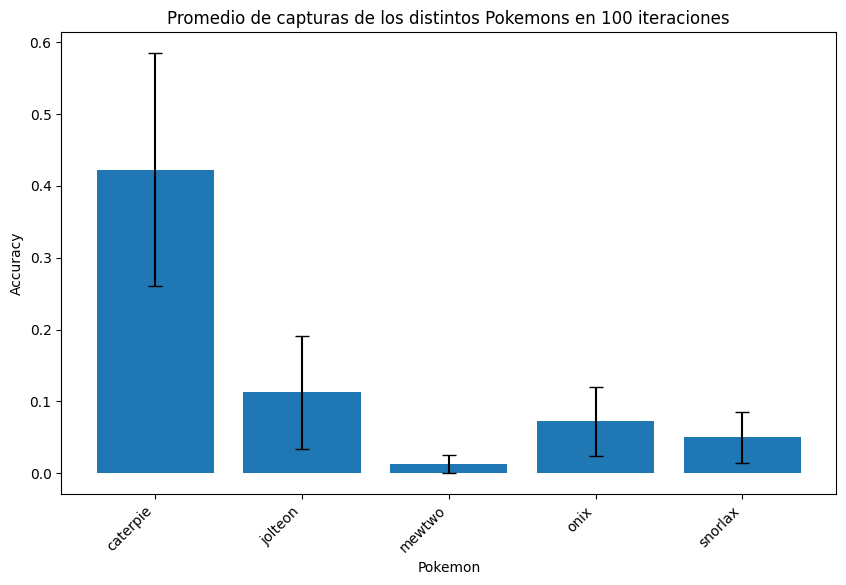

In [8]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crear las barras del gráfico
x = df["pokemon_name_"]
y = df["accuracy_mean"]
error = df["accuracy_std"]
ax.bar(x, y, yerr=error, capsize=5)

# Configurar el eje x
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=45, ha="right")
ax.set_xlabel("Pokemon")

# Configurar el eje y
ax.set_ylabel("Accuracy")

# Añadir título
ax.set_title("Promedio de capturas de los distintos Pokemons en 100 iteraciones")

# Mostrar el gráfico
plt.show()